C:\Users\cream\AppData\Local\Temp\ipykernel_4696\1454772428.py:80: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=labels, y=counts, palette='viridis')


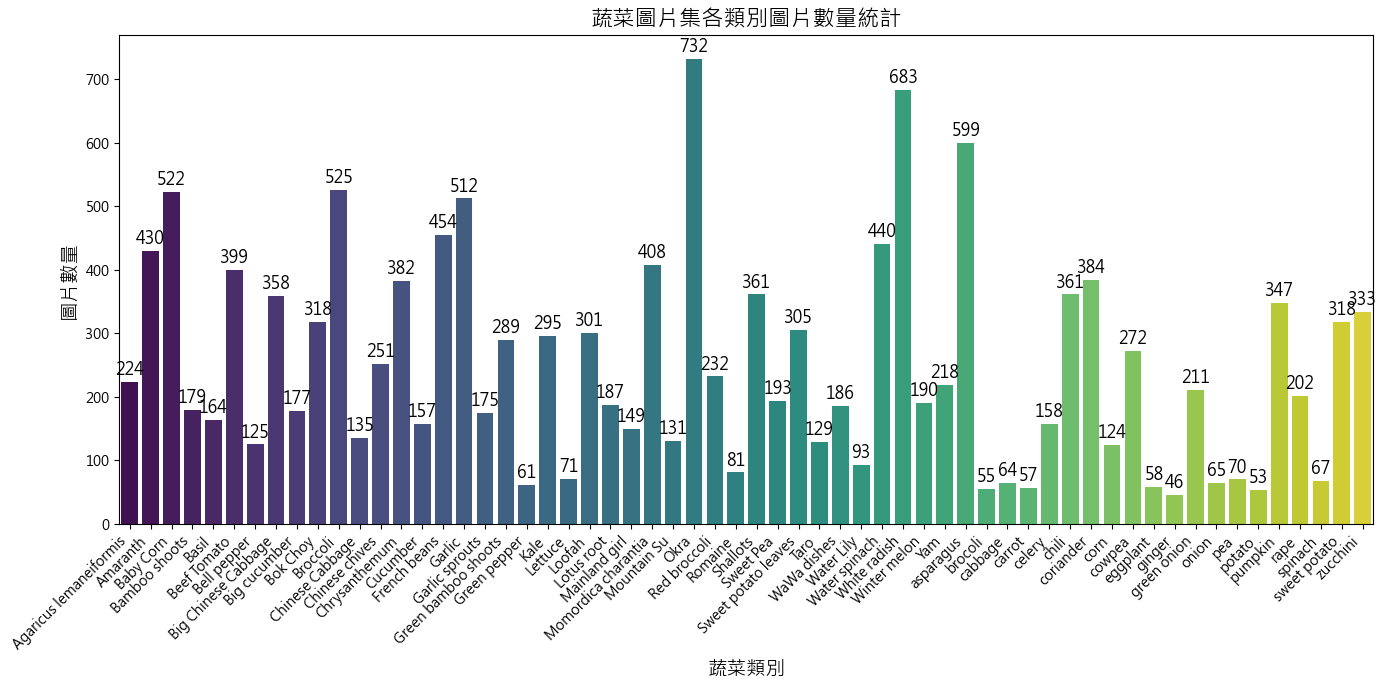

In [5]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import random

# --- 步驟 1: 處理中文字體顯示問題 ---
# Matplotlib 預設字體可能不支援中文，需要設定中文字體
# 以下提供兩種常見作業系統的設定方式

# 檢查作業系統
if os.name == 'nt': # Windows
    plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] # 微軟正黑體
elif os.name == 'posix': # macOS or Linux
    # macOS 使用 'PingFang TC' 或 'Heiti TC'
    # Linux 需要確認已安裝中文字體，例如 'Noto Sans CJK TC'
    # 如果下列字體不存在，請換成您系統中已安裝的中文字體
    plt.rcParams['font.sans-serif'] = ['Heiti TC'] 

plt.rcParams['axes.unicode_minus'] = False  # 解決負號顯示問題

# --- 步驟 2: 模擬建立資料夾與檔案 (如果資料夾已存在，請忽略此部分) ---
# 為了讓程式碼能直接運行，我們先建立假的資料夾和檔案
root_dir = '../dataset_full_en/train'
# categories = ['大白菜', '小白菜', '紅蘿蔔', '玉米', '茄子', '馬鈴薯']

# 如果根目錄不存在，就建立它
if not os.path.exists(root_dir):
    os.makedirs(root_dir)
    print(f"資料夾 '{root_dir}' 已建立。")
    # 在每個類別資料夾中建立隨機數量的假圖片檔案
    for category in categories:
        category_path = os.path.join(root_dir, category)
        os.makedirs(category_path)
        # 建立 50 到 150 之間的隨機數量的檔案
        num_files = random.randint(50, 150)
        for i in range(num_files):
            # 建立空白檔案作為示意
            with open(os.path.join(category_path, f'image_{i}.jpg'), 'w') as fp:
                pass
    print("已建立模擬的資料夾與圖片檔案。")


# --- 步驟 3: 計算每個類別的圖片數量 ---
def get_category_counts(directory):
    """
    計算指定目錄下每個子資料夾中的檔案數量。
    
    Args:
        directory (str): 目標根目錄路徑。
        
    Returns:
        tuple: (類別名稱列表, 對應的檔案數量列表)
    """
    category_names = []
    image_counts = []

    # 檢查根目錄是否存在
    if not os.path.exists(directory):
        print(f"錯誤：找不到資料夾 '{directory}'")
        return None, None

    # 遍歷根目錄下的所有項目
    for item in sorted(os.listdir(directory)):
        item_path = os.path.join(directory, item)
        # 如果是資料夾，就進行計數
        if os.path.isdir(item_path):
            num_files = len(os.listdir(item_path))
            category_names.append(item)
            image_counts.append(num_files)
            
    return category_names, image_counts

# --- 步驟 4: 繪製長條圖的函式 (仿照您的風格) ---
def plot_counts(labels, counts, title):
    """
    根據給定的類別標籤和數量繪製長條圖。
    """
    plt.figure(figsize=(14, 7))
    # 使用 barplot，因為我們已經有了 x (labels) 和 y (counts)
    ax = sns.barplot(x=labels, y=counts, palette='viridis')
    
    plt.xlabel('蔬菜類別', fontsize=14)
    plt.ylabel('圖片數量', fontsize=14)
    plt.title(title, fontsize=16)
    plt.xticks(rotation=45, ha='right') # 讓 x 軸標籤旋轉，避免重疊
    
    # 在每個長條的頂端加上數字標註
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='baseline', 
                    fontsize=12, color='black', 
                    xytext=(0, 5),
                    textcoords='offset points')
    
    plt.tight_layout() # 自動調整佈局
    plt.show()

# --- 主程式執行區 ---
# 獲取資料夾中的類別與數量
labels, counts = get_category_counts(root_dir)

# 如果成功獲取到資料，就繪製圖表
if labels and counts:
    plot_counts(labels, counts, '蔬菜圖片集各類別圖片數量統計')